# IMPORT LIBRARY

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from scipy.stats.mstats import winsorize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# LOAD DATA

In [2]:
df = pd.read_excel("/content/Dataset Bali.xlsx")

In [3]:
df

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,01-01-2010,25,31.2,28.5,84,4.4,6.5,5,270,3,W
1,02-01-2010,26,31.5,28.5,83,0,8,6,270,3,W
2,03-01-2010,27,31.8,29.6,82,1,7.9,6,270,3,W
3,04-01-2010,27,32,28.9,84,0,7.4,6,270,4,W
4,05-01-2010,27,31.8,29.8,81,8888,6.3,6,270,3,W
...,...,...,...,...,...,...,...,...,...,...,...
5716,27-08-2025,24.8,29.2,26.4,76,1,8,7,140,4,SE
5717,28-08-2025,24.8,29.2,26.5,74,0,6,5,140,4,SE
5718,29-08-2025,25,28.6,26.4,74,0.4,7.2,5,140,4,SE
5719,30-08-2025,25,29.4,26.5,76,8888,3,5,130,3,SE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5721 entries, 0 to 5720
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TANGGAL  5721 non-null   object
 1   TN       5721 non-null   object
 2   TX       5721 non-null   object
 3   TAVG     5721 non-null   object
 4   RH_AVG   5721 non-null   object
 5   RR       5721 non-null   object
 6   SS       5721 non-null   object
 7   FF_X     5721 non-null   int64 
 8   DDD_X    5721 non-null   int64 
 9   FF_AVG   5721 non-null   int64 
 10  DDD_CAR  5721 non-null   object
dtypes: int64(3), object(8)
memory usage: 491.8+ KB


# DROP KOLOM YANG TIDAK TERPAKAI

In [5]:
# Kolom yang ingin disimpan
kolom_dipakai = ['TAVG', 'RH_AVG', 'RR', 'SS', 'FF_AVG']

# Hapus kolom lainnya
df = df[kolom_dipakai]

# Cek hasilnya
df.head()

,TAVG,RH_AVG,RR,SS,FF_AVG
0,28.5,84,4.4,6.5,3
1,28.5,83,0,8,3
2,29.6,82,1,7.9,3
3,28.9,84,0,7.4,4
4,29.8,81,8888,6.3,3


In [6]:
df

,TAVG,RH_AVG,RR,SS,FF_AVG
0,28.5,84,4.4,6.5,3
1,28.5,83,0,8,3
2,29.6,82,1,7.9,3
3,28.9,84,0,7.4,4
4,29.8,81,8888,6.3,3
...,...,...,...,...,...
5716,26.4,76,1,8,4
5717,26.5,74,0,6,4
5718,26.4,74,0.4,7.2,4
5719,26.5,76,8888,3,3


# PREPROCESSING DATA

In [7]:
# Daftar kolom numerik yang ingin diubah ke float
kolom_numerik = ['TAVG', 'RH_AVG', 'RR', 'SS']

# Konversi kolom numerik ke float
for col in kolom_numerik:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# hasil tipe data baru
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5721 entries, 0 to 5720
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TAVG    5663 non-null   float64
 1   RH_AVG  5667 non-null   float64
 2   RR      5650 non-null   float64
 3   SS      5602 non-null   float64
 4   FF_AVG  5721 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 223.6 KB
None


/tmp/ipython-input-3755608756.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


In [8]:
# Mengganti nilai 8888 di kolom 'rr' dengan NaN, lalu mengisinya dengan median
df['RR'] = df['RR'].replace(8888, np.nan)
median_RR = df['RR'].median()
df['RR'].fillna(median_RR, inplace=True)

/tmp/ipython-input-1359815041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RR'] = df['RR'].replace(8888, np.nan)
/tmp/ipython-input-1359815041.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RR'].fillna(median_RR, inplace=True)
/tmp/ipython-input-1359815041.py:4: Setti

In [9]:
# Memastikan semua kolom target adalah numerik dan tidak ada nilai yang hilang
for col in ['TAVG', 'RH_AVG', 'RR', 'SS', 'FF_AVG']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=['TAVG', 'RH_AVG', 'RR', 'SS', 'FF_AVG'], inplace=True)

/tmp/ipython-input-281810567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipython-input-281810567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['TAVG', 'RH_AVG', 'RR', 'SS', 'FF_AVG'], inplace=True)


In [10]:
# buat kolom baru FF_AVG_kmh hasil konversi dari m/s ke km/h
df["FF_AVG_kmh"] = df["FF_AVG"] * 3.6

# tampilkan 5 baris pertama untuk memastikan hasilnya
print(df[["FF_AVG", "FF_AVG_kmh"]].head())

# cek statistik dasar untuk memastikan masuk akal
print("\nStatistik FF_AVG (m/s):")
print(df["FF_AVG"].describe())

print("\nStatistik FF_AVG_kmh (km/h):")
print(df["FF_AVG_kmh"].describe())

   FF_AVG  FF_AVG_kmh
0       3        10.8
1       3        10.8
2       3        10.8
3       4        14.4
4       3        10.8

Statistik FF_AVG (m/s):
count    5549.000000
mean        3.275725
std         1.327849
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
Name: FF_AVG, dtype: float64

Statistik FF_AVG_kmh (km/h):
count    5549.000000
mean       11.792611
std         4.780257
min         0.000000
25%         7.200000
50%        10.800000
75%        14.400000
max        46.800000
Name: FF_AVG_kmh, dtype: float64


/tmp/ipython-input-1058455805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FF_AVG_kmh"] = df["FF_AVG"] * 3.6


# PENGUBAHAN VARIABLE SS MENJADI CC

In [11]:
N_DAY = 12.0  # 12 JAM MAKSIMAL PENYINARAN MATAHARI KHATULISTIWA

# Konversi SS -> CC
def ss_to_cc(ss, N=N_DAY):
    ss = float(ss)
    cc = 100.0 * (1.0 - ss / N)
    return max(0.0, min(100.0, cc))  # clamp 0..100

# RUMUS PANTAI

In [12]:
TC_TABLE = [
    (39.0, float("inf"), 0),
    (38.0, 38.9, 2),
    (37.0, 37.9, 4),
    (36.0, 36.9, 5),
    (35.0, 35.9, 6),
    (34.0, 34.9, 7),
    (33.0, 33.9, 8),
    (31.0, 32.9, 9),
    (28.0, 30.9, 10),
    (26.0, 27.9, 9),
    (23.0, 25.9, 7),
    (22.0, 22.9, 6),
    (21.0, 21.9, 5),
    (20.0, 20.9, 4),
    (19.0, 19.9, 3),
    (18.0, 18.9, 2),
    (17.0, 17.9, 1),
    (15.0, 16.9, 0),
    (10.0, 14.9, -5),
    (-float("inf"), 9.9, -10),
]

A_TABLE = [
    (0.0,   0.9,   8),
    (1.0,   14.9,  9),
    (15.0,  25.9, 10),
    (26.0,  35.9,  9),
    (36.0,  45.9,  8),
    (46.0,  55.9,  7),
    (56.0,  65.9,  6),
    (66.0,  75.9,  5),
    (76.0,  85.9,  4),
    (86.0,  95.9,  3),
    (96.0,  float("inf"), 2),
]

# P = Precipitation (mm)
P_TABLE = [
    (0.00,  0.00, 10),
    (0.01,  2.99,  9),
    (3.00,  5.99,  8),
    (6.00,  8.99,  6),
    (9.00, 11.99,  4),
    (12.00, 24.99,  0),
    (25.00, float("inf"), -1),
]

# W = Wind (km/h)
W_TABLE = [
    (0.0,   0.5,   8),
    (0.6,   9.9,  10),
    (10.0, 19.9,   9),
    (20.0, 29.9,   8),
    (30.0, 39.9,   6),
    (40.0, 49.9,   3),
    (50.0, 69.9,   0),
    (70.0, float("inf"), -10),
]

def lookup_score(value, table):
    for lower, upper, rating in table:
        if lower <= value <= upper:
            return rating
    return None

def ss_to_cc(ss_hours):
    cc = 100.0 * (1.0 - (ss_hours / 12.0))
    return float(np.clip(cc, 0.0, 100.0))

if "CC" in df.columns:
    df["CC_equiv"] = df["CC"].clip(lower=0, upper=100)
else:
    df["CC_equiv"] = df["SS"].apply(ss_to_cc)   # SS diasumsikan dalam JAM


TC = df["TAVG"].apply(lambda x: lookup_score(x, TC_TABLE))
A  = df["CC_equiv"].apply(lambda x: lookup_score(x, A_TABLE))
P  = df["RR"].apply(lambda x: lookup_score(x, P_TABLE))
W  = df["FF_AVG_kmh"].apply(lambda x: lookup_score(x, W_TABLE))


df["HCI_beach_0_100"] = 2 * TC + 4 * A + 3 * P + W


df["Pantai"] = (df["HCI_beach_0_100"] >= 60).astype(int)


df["HCI_beach_0_100"] = df["HCI_beach_0_100"].round(0)  # atau .round(2) bila mau desimal

/tmp/ipython-input-4026360351.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CC_equiv"] = df["SS"].apply(ss_to_cc)   # SS diasumsikan dalam JAM
/tmp/ipython-input-4026360351.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HCI_beach_0_100"] = 2 * TC + 4 * A + 3 * P + W
/tmp/ipython-input-4026360351.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

# RUMUS HIKING

In [13]:
df["CC_from_SS"] = 100 * (1 - df["SS"] / 12)

temp_ok = df["TAVG"].between(10, 30, inclusive="both")
rh_ok   = df["RH_AVG"].between(40, 80, inclusive="both")
rain_ok = df["RR"] < 20
sun_ok  = df["CC_from_SS"] < 83.3
wind_ok = df["FF_AVG_kmh"] < 20

df["Hiking"] = (temp_ok & rh_ok & rain_ok & sun_ok & wind_ok).astype(int)

/tmp/ipython-input-1653323991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CC_from_SS"] = 100 * (1 - df["SS"] / 12)
/tmp/ipython-input-1653323991.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hiking"] = (temp_ok & rh_ok & rain_ok & sun_ok & wind_ok).astype(int)


# RUMUS SNORKELING

In [14]:
W_THI, W_S, W_P, W_W = 0.367, 0.519, 0.085, 0.028


def rate_from_table(x, table):
    for low, high, r in table:
        if (low is None or x >= low) and (high is None or x <= high):
            return r
    return 0

def clamp(x, lo, hi):
    return max(lo, min(hi, x))

# THI
def calc_thi(tavg, rh_avg):
    return 0.8 * tavg + (rh_avg * tavg) / 500.0

THI_TABLE = [
    (28.0,  None, 0), (None, 14.9, 0),
    (27.5,  27.9, 3), (17.0, 17.9, 3),
    (27.0,  27.4, 5), (19.0, 19.9, 5),
    (26.5,  26.9, 6), (20.0, 20.9, 6),
    (26.0,  26.4, 7), (21.0, 21.9, 7),
    (25.5,  25.9, 8), (22.0, 22.9, 8),
    (25.0,  25.4, 9), (23.0, 23.9, 9),
    (24.0,  24.9, 10),
    (18.0,  18.9, 4),
    (16.0,  16.9, 2),
    (15.0,  15.9, 1),
]

# SS to CC
def ss_to_cc(ss_hours):
    return clamp(100.0 * (1.0 - (ss_hours / 12.0)), 0.0, 100.0)

S_TABLE_CC = [
    (None, 16.7, 10),
    (16.8, 24.9, 9),
    (25.1, 33.3, 8),
    (33.4, 41.7, 7),
    (41.8, 50.0, 6),
    (50.1, 58.3, 5),
    (58.4, 66.7, 4),
    (66.8, 75.0, 3),
    (75.1, 83.3, 2),
    (83.5, 91.7, 1),
    (91.8, None, 0),
]

# Hujan (P)
P_TABLE_SNORK = [
    (0.0,   0.0, 10),
    (0.1,   1.9, 9),
    (2.0,   2.9, 8),
    (3.0,   3.9, 7),
    (4.0,   4.9, 6),
    (5.0,   5.9, 5),
    (6.0,   6.9, 4),
    (7.0,   7.9, 3),
    (8.0,   8.9, 2),
    (9.0,   9.9, 1),
    (10.0,  None, 0),
]

# Angin (W)
W_TABLE_SNORK = [
    (6.0,  11.9, 10),
    (1.0,   5.9,  9), (12.0, 15.9, 9),
    (None,  0.99, 8), (16.0, 19.9, 8),
    (20.0, 24.9, 7),
    (25.0, 28.9, 6),
    (29.0, 33.9, 5),
    (34.0, 38.9, 4),
    (39.0, 43.9, 3),
    (44.0, 49.9, 2),
    (50.0, 55.9, 1),
    (56.0, None, 0),
]

def compute_snorkeling_view(df, threshold=5):
    thi = 0.8 * df["TAVG"] + (df["RH_AVG"] * df["TAVG"]) / 500.0
    thi_rating = thi.apply(lambda x: rate_from_table(x, THI_TABLE))

    cc = (100.0 * (1.0 - (df["SS"] / 12.0))).clip(0.0, 100.0)
    s_rating = cc.apply(lambda x: rate_from_table(x, S_TABLE_CC))

    p_rating = df["RR"].apply(lambda x: rate_from_table(x, P_TABLE_SNORK))
    w_rating = df["FF_AVG_kmh"].apply(lambda x: rate_from_table(x, W_TABLE_SNORK))

    ctci_bali = (
        W_THI * thi_rating +
        W_S   * s_rating   +
        W_P   * p_rating   +
        W_W   * w_rating
    )

    snorkeling = (ctci_bali >= threshold).astype(int)


    return pd.DataFrame({
        "CTCI_Bali": ctci_bali,
        "Snorkeling": snorkeling
    }, index=df.index)


snorkeling_view = compute_snorkeling_view(df)
df["CTCI_Bali"] = snorkeling_view["CTCI_Bali"]
df["Snorkeling"] = snorkeling_view["Snorkeling"]

/tmp/ipython-input-2467939009.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CTCI_Bali"] = snorkeling_view["CTCI_Bali"]
/tmp/ipython-input-2467939009.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Snorkeling"] = snorkeling_view["Snorkeling"]


# RUMUS RAFTING

In [15]:
def classify_rafting(rr):
    return 1 if rr < 100 else 0

df["Rafting"] = df["RR"].apply(classify_rafting)

/tmp/ipython-input-3458090700.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rafting"] = df["RR"].apply(classify_rafting)


In [16]:
df

,TAVG,RH_AVG,RR,SS,FF_AVG,FF_AVG_kmh,CC_equiv,HCI_beach_0_100,Pantai,CC_from_SS,Hiking,CTCI_Bali,Snorkeling,Rafting
0,28.5,84.0,4.4,6.5,3,10.8,45.833333,85,1,45.833333,0,5.005,1,1
1,28.5,83.0,0.0,8.0,3,10.8,33.333333,95,1,33.333333,0,2.231,0,1
2,29.6,82.0,1.0,7.9,3,10.8,34.166667,92,1,34.166667,0,4.678,0,1
3,28.9,84.0,0.0,7.4,4,14.4,38.333333,91,1,38.333333,0,4.735,0,1
4,29.8,81.0,0.0,6.3,3,10.8,47.500000,87,1,47.500000,0,4.244,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5716,26.4,76.0,1.0,8.0,4,14.4,33.333333,90,1,33.333333,1,4.320,0,1
5717,26.5,74.0,0.0,6.0,4,14.4,50.000000,85,1,50.000000,1,7.519,1,1
5718,26.4,74.0,0.4,7.2,4,14.4,40.000000,86,1,40.000000,1,7.953,1,1
5719,26.5,76.0,0.0,3.0,3,10.8,75.000000,77,1,75.000000,1,5.990,1,1


#Modelling

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [18]:
X = df.drop(columns=["Pantai", "Hiking", "Snorkeling", "Rafting",'HCI_beach_0_100'])
y = df[["Pantai", "Hiking", "Snorkeling", "Rafting"]]


In [19]:
def evaluate(y_true, y_pred):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision (macro)": precision_score(y_true, y_pred, average='macro', zero_division=0),
        "Recall (macro)": recall_score(y_true, y_pred, average='macro', zero_division=0),
        "F1-score (macro)": f1_score(y_true, y_pred, average='macro', zero_division=0)
    }
    return metrics

In [20]:
splits = {"70_30": 0.3, "80_20": 0.2}

results = {}
for name, test_size in splits.items():
    print(f"\n===== Eksperimen {name} =====")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )
    model = MultiOutputClassifier(rf)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1_macro', n_jobs=-1)
    print(f"Cross-val F1 (mean ± std): {fold_scores.mean():.4f} ± {fold_scores.std():.4f}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = evaluate(y_test, y_pred)
    results[name] = metrics


===== Eksperimen 70_30 =====
Cross-val F1 (mean ± std): 0.9984 ± 0.0006

===== Eksperimen 80_20 =====
Cross-val F1 (mean ± std): 0.9989 ± 0.0006


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, hamming_loss, jaccard_score)
import warnings
warnings.filterwarnings('ignore')


print("="*60)
print("DATASET INFO")
print("="*60)
print(f"Total data: {len(df)}")
print(f"Jumlah fitur: {df.shape[1] - 4}")
print(f"\nDistribusi label:")
print(df[["Pantai", "Hiking", "Snorkeling", "Rafting"]].sum())
print()

X = df.drop(columns=["Pantai", "Hiking", "Snorkeling", "Rafting"])
y = df[["Pantai", "Hiking", "Snorkeling", "Rafting"]]

def evaluate_multilabel(y_true, y_pred):
    """
    Evaluasi khusus untuk multi-label classification
    """
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Hamming Loss": hamming_loss(y_true, y_pred),
        "Precision (macro)": precision_score(y_true, y_pred, average='macro', zero_division=0),
        "Precision (micro)": precision_score(y_true, y_pred, average='micro', zero_division=0),
        "Recall (macro)": recall_score(y_true, y_pred, average='macro', zero_division=0),
        "Recall (micro)": recall_score(y_true, y_pred, average='micro', zero_division=0),
        "F1-score (macro)": f1_score(y_true, y_pred, average='macro', zero_division=0),
        "F1-score (micro)": f1_score(y_true, y_pred, average='micro', zero_division=0),
        "Jaccard Score": jaccard_score(y_true, y_pred, average='samples', zero_division=0)
    }
    return metrics

def evaluate_per_label(y_true, y_pred, labels):
    """
    Evaluasi per label individual
    """
    results = []
    for i, label in enumerate(labels):
        metrics = {
            "Label": label,
            "Precision": precision_score(y_true.iloc[:, i], y_pred[:, i], zero_division=0),
            "Recall": recall_score(y_true.iloc[:, i], y_pred[:, i], zero_division=0),
            "F1-score": f1_score(y_true.iloc[:, i], y_pred[:, i], zero_division=0)
        }
        results.append(metrics)
    return pd.DataFrame(results)

def kfold_cross_validation(X, y, k=5):
    """
    K-Fold cross validation manual untuk multi-label
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_results = []

    print(f"\n{'='*60}")
    print(f"K-FOLD CROSS VALIDATION (k={k})")
    print(f"{'='*60}")

    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X), 1):
        X_train_fold = X.iloc[train_idx]
        X_val_fold = X.iloc[val_idx]
        y_train_fold = y.iloc[train_idx]
        y_val_fold = y.iloc[val_idx]

        rf = RandomForestClassifier(
            n_estimators=200,
            max_depth=None,
            min_samples_split=2,
            min_samples_leaf=1,
            random_state=42,
            n_jobs=-1
        )
        model = MultiOutputClassifier(rf)
        model.fit(X_train_fold, y_train_fold)

        y_pred_fold = model.predict(X_val_fold)

        f1_macro = f1_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)
        f1_micro = f1_score(y_val_fold, y_pred_fold, average='micro', zero_division=0)
        accuracy = accuracy_score(y_val_fold, y_pred_fold)

        fold_results.append({
            'Fold': fold_idx,
            'Accuracy': accuracy,
            'F1-Macro': f1_macro,
            'F1-Micro': f1_micro
        })

        print(f"Fold {fold_idx}: Accuracy={accuracy:.4f}, F1-Macro={f1_macro:.4f}, F1-Micro={f1_micro:.4f}")

    fold_df = pd.DataFrame(fold_results)
    print(f"\n{'='*60}")
    print("RATA-RATA K-FOLD:")
    print(f"Accuracy: {fold_df['Accuracy'].mean():.4f} ± {fold_df['Accuracy'].std():.4f}")
    print(f"F1-Macro: {fold_df['F1-Macro'].mean():.4f} ± {fold_df['F1-Macro'].std():.4f}")
    print(f"F1-Micro: {fold_df['F1-Micro'].mean():.4f} ± {fold_df['F1-Micro'].std():.4f}")
    print(f"{'='*60}\n")

    return fold_df

splits = {
    "70:30": 0.3,
    "80:20": 0.2
}

all_results = {}
per_label_results = {}
labels = ["Pantai", "Hiking", "Snorkeling", "Rafting"]

for split_name, test_size in splits.items():
    print(f"\n{'#'*60}")
    print(f"EKSPERIMEN SPLIT {split_name}")
    print(f"{'#'*60}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, shuffle=True
    )

    print(f"\nUkuran data:")
    print(f"  Training: {len(X_train)} samples")
    print(f"  Testing:  {len(X_test)} samples")

    kfold_results = kfold_cross_validation(X_train, y_train, k=5)

    print(f"\n{'='*60}")
    print("TRAINING FINAL MODEL")
    print(f"{'='*60}")

    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1
    )
    model = MultiOutputClassifier(rf)
    model.fit(X_train, y_train)

    print("\nPrediksi pada test set...")
    y_pred_test = model.predict(X_test)

    metrics = evaluate_multilabel(y_test, y_pred_test)
    all_results[split_name] = metrics

    per_label = evaluate_per_label(y_test, y_pred_test, labels)
    per_label_results[split_name] = per_label

    print(f"\n{'='*60}")
    print(f"HASIL TEST SET - SPLIT {split_name}")
    print(f"{'='*60}")
    print("\nMetrik Overall:")
    for metric, value in metrics.items():
        print(f"  {metric:20s}: {value:.4f}")

    print(f"\n{'='*60}")
    print("Metrik Per Label:")
    print(f"{'='*60}")
    print(per_label.to_string(index=False))
    print()

print(f"\n{'#'*60}")
print("PERBANDINGAN HASIL AKHIR")
print(f"{'#'*60}\n")

print("="*60)
print("METRIK OVERALL")
print("="*60)
results_df = pd.DataFrame(all_results).T
print(results_df.to_string())
print()

print("="*60)
print("PERBANDINGAN PER LABEL")
print("="*60)
for split_name, per_label_df in per_label_results.items():
    print(f"\nSplit {split_name}:")
    print(per_label_df.to_string(index=False))

print(f"\n{'#'*60}")
print("KESIMPULAN")
print(f"{'#'*60}")

best_split_accuracy = results_df['Accuracy'].idxmax()
best_split_f1_macro = results_df['F1-score (macro)'].idxmax()

print(f"\nSplit terbaik berdasarkan Accuracy: {best_split_accuracy}")
print(f"  Accuracy: {results_df.loc[best_split_accuracy, 'Accuracy']:.4f}")

print(f"\nSplit terbaik berdasarkan F1-Macro: {best_split_f1_macro}")
print(f"  F1-Macro: {results_df.loc[best_split_f1_macro, 'F1-score (macro)']:.4f}")

print(f"\n{'='*60}\n")

DATASET INFO
Total data: 5549
Jumlah fitur: 10

Distribusi label:
Pantai        4890
Hiking        2394
Snorkeling    3327
Rafting       5529
dtype: int64


############################################################
EKSPERIMEN SPLIT 70:30
############################################################

Ukuran data:
  Training: 3884 samples
  Testing:  1665 samples

K-FOLD CROSS VALIDATION (k=5)
Fold 1: Accuracy=0.9987, F1-Macro=0.9998, F1-Micro=0.9998
Fold 2: Accuracy=0.9987, F1-Macro=0.9996, F1-Micro=0.9998
Fold 3: Accuracy=0.9987, F1-Macro=0.9996, F1-Micro=0.9998
Fold 4: Accuracy=0.9974, F1-Macro=0.9994, F1-Micro=0.9996
Fold 5: Accuracy=0.9974, F1-Macro=0.9995, F1-Micro=0.9996

RATA-RATA K-FOLD:
Accuracy: 0.9982 ± 0.0007
F1-Macro: 0.9996 ± 0.0002
F1-Micro: 0.9997 ± 0.0001


TRAINING FINAL MODEL

Prediksi pada test set...

HASIL TEST SET - SPLIT 70:30

Metrik Overall:
  Accuracy            : 0.9982
  Hamming Loss        : 0.0005
  Precision (macro)   : 0.9990
  Precision (micro)   : 0.

Accuracy       : 0.9982
Hamming Loss   : 0.0005
Precision      : 0.9990
Recall         : 1.0000
F1-Score       : 0.9995


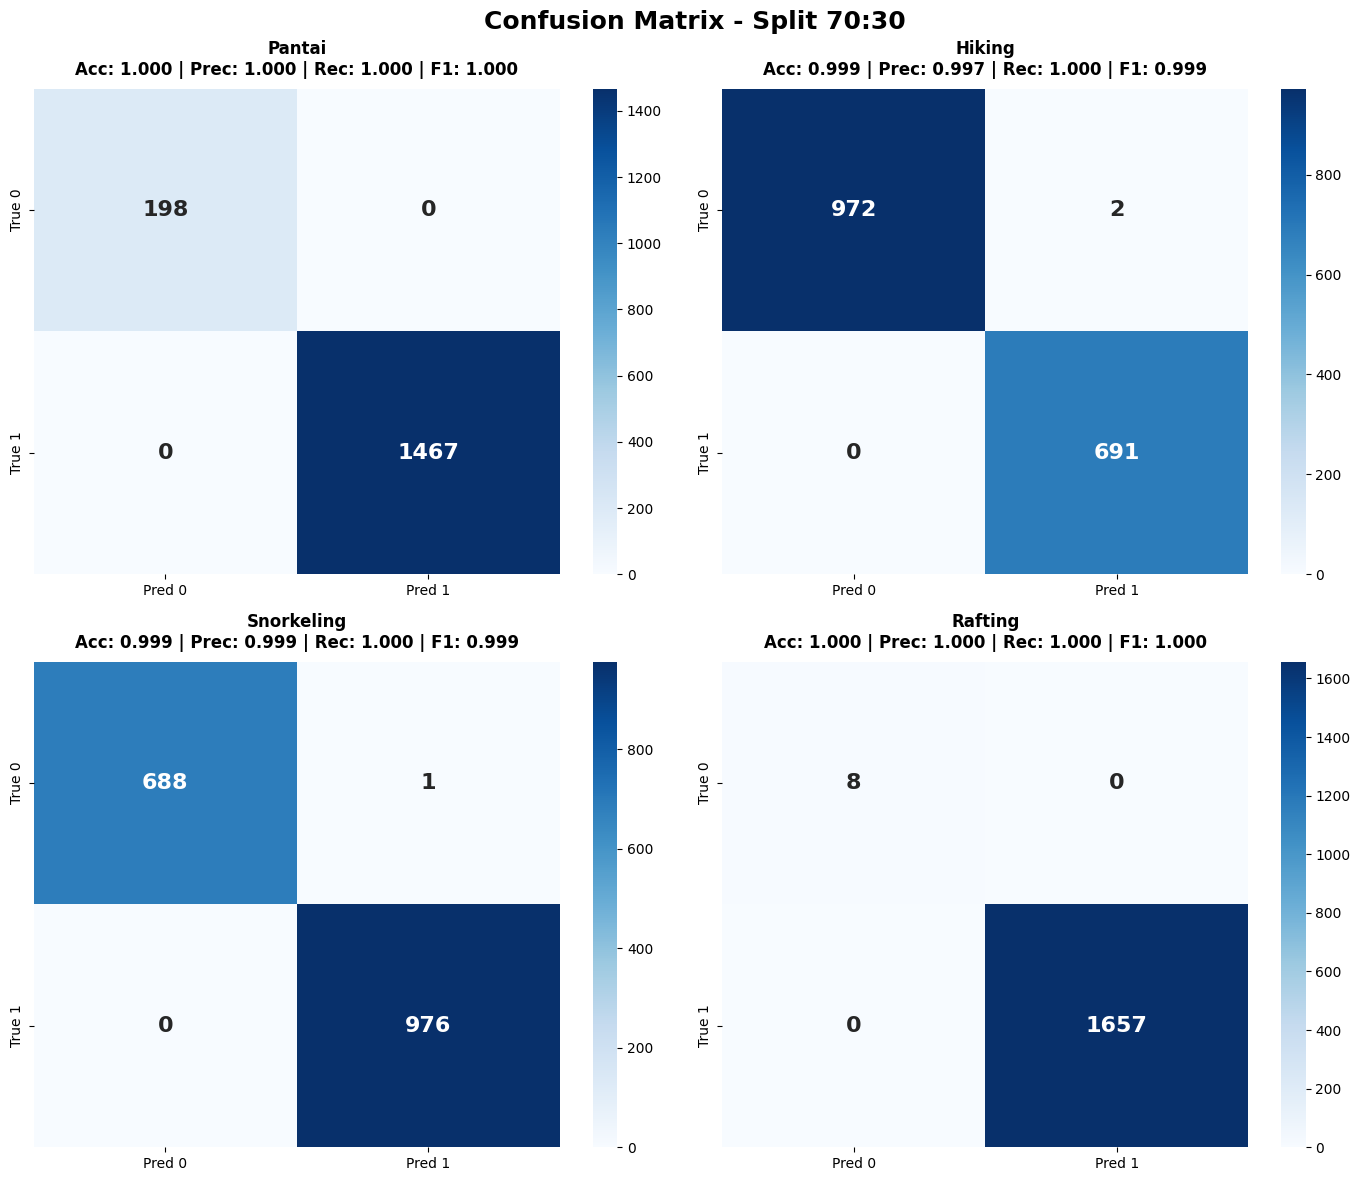

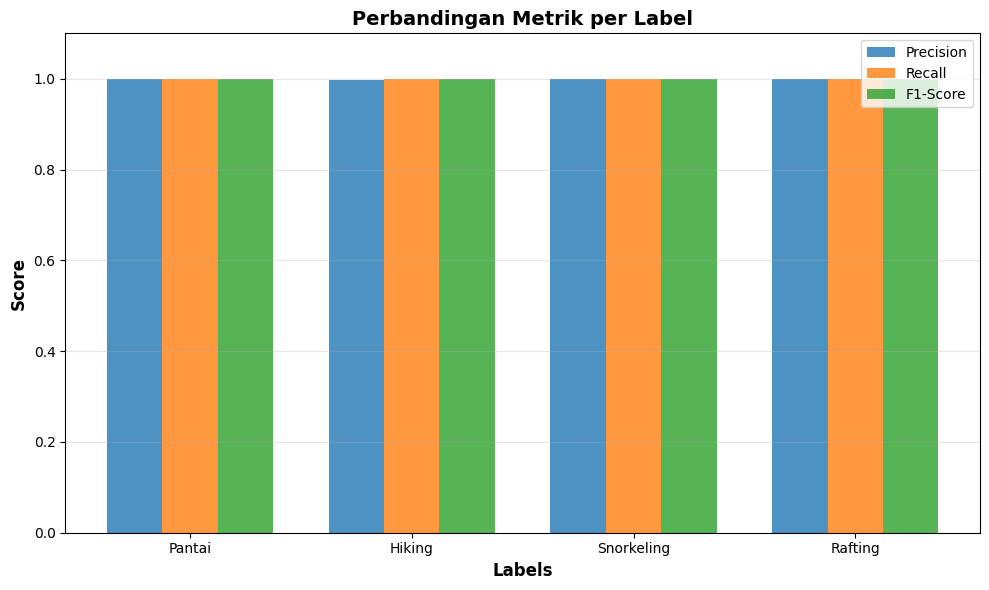

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    hamming_loss, classification_report, multilabel_confusion_matrix
)
import warnings
warnings.filterwarnings('ignore')

# Load data

# Split X dan y
X = df.drop(columns=["Pantai", "Hiking", "Snorkeling", "Rafting"])
y = df[["Pantai", "Hiking", "Snorkeling", "Rafting"]]
labels = ["Pantai", "Hiking", "Snorkeling", "Rafting"]

# Split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training
rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, n_jobs=-1)
model = MultiOutputClassifier(rf)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
hamming = hamming_loss(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)

# Metrik per label
per_label = []
for i, label in enumerate(labels):
    per_label.append({
        'Label': label,
        'Precision': precision_score(y_test.iloc[:, i], y_pred[:, i], zero_division=0),
        'Recall': recall_score(y_test.iloc[:, i], y_pred[:, i], zero_division=0),
        'F1-Score': f1_score(y_test.iloc[:, i], y_pred[:, i], zero_division=0)
    })
per_label_df = pd.DataFrame(per_label)


print(f"Accuracy       : {accuracy:.4f}")
print(f"Hamming Loss   : {hamming:.4f}")
print(f"Precision      : {precision_macro:.4f}")
print(f"Recall         : {recall_macro:.4f}")
print(f"F1-Score       : {f1_macro:.4f}")


mcm = multilabel_confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Confusion Matrix - Split 70:30', fontsize=18, fontweight='bold')
axes = axes.ravel()

for idx, (cm, label) in enumerate(zip(mcm, labels)):
    tn, fp, fn, tp = cm.ravel()
    acc = (tp + tn) / (tp + tn + fp + fn)
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0
    rec = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['True 0', 'True 1'],
                cbar=True, ax=axes[idx], annot_kws={'size': 16, 'weight': 'bold'})

    axes[idx].set_title(f'{label}\nAcc: {acc:.3f} | Prec: {prec:.3f} | Rec: {rec:.3f} | F1: {f1:.3f}',
                        fontsize=12, fontweight='bold', pad=10)

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(labels))
width = 0.25

ax.bar(x - width, per_label_df['Precision'], width, label='Precision', alpha=0.8)
ax.bar(x, per_label_df['Recall'], width, label='Recall', alpha=0.8)
ax.bar(x + width, per_label_df['F1-Score'], width, label='F1-Score', alpha=0.8)

ax.set_xlabel('Labels', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Perbandingan Metrik per Label', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
import joblib
import pickle

joblib.dump(model, 'model_random_forest.pkl')

['model_random_forest.pkl']